In [1]:
from time import sleep
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline
sns.set()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv("cow_data.csv")

In [3]:
columns=df.columns[1:9]
df=df.iloc[0:len(df),[1,2,3,4,5,6,7,8]]
df.columns=columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28231 entries, 0 to 28230
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   性別      28231 non-null  object
 1   父牛      28231 non-null  object
 2   母の父     28231 non-null  object
 3   母の祖父    28231 non-null  object
 4   母の祖祖父   28231 non-null  object
 5   日令      28231 non-null  int64 
 6   体重      28231 non-null  int64 
 7   価格      28231 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.7+ MB


In [5]:
col_names = df.columns
for col_name in col_names:
    missing_num = sum(pd.isnull(df[col_name]))
    print(col_name,':missing record number is',missing_num)

性別 :missing record number is 0
父牛 :missing record number is 0
母の父 :missing record number is 0
母の祖父 :missing record number is 0
母の祖祖父 :missing record number is 0
日令 :missing record number is 0
体重 :missing record number is 0
価格 :missing record number is 0


In [6]:
df.corr()

,日令,体重,価格
日令,1.000000,0.067028,-0.078040
体重,0.067028,1.000000,0.594039
価格,-0.078040,0.594039,1.000000


/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20307 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 37325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20385 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26684 missing from c

<AxesSubplot:>

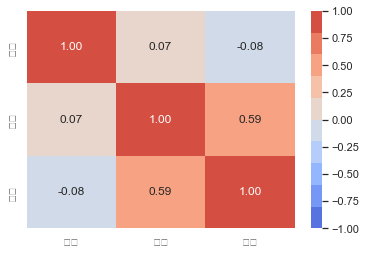

In [7]:
cor = df.corr()
plt.figure()
sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

In [8]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,日令,体重,価格
count,28231.00,28231.00,28231.00
mean,290.06,306.44,727174.84
std,14.94,37.82,161945.55
min,207.00,124.00,96800.00
25%,280.50,280.00,633600.00
50%,290.00,306.00,727100.00
75%,300.00,332.00,825000.00
max,379.00,479.00,2334200.00


In [9]:
df_copy = df.copy()
df_copy.rename(columns={"日令":"age", "体重":"weight" ,"価格":"price"}, inplace=True)

In [10]:
def grasp(colum):
    d = df_copy[colum].value_counts().to_dict()
    myList = d.items()
    myList = sorted(myList) 
    x, y = zip(*myList) 

    plt.plot(x, y)
    plt.show()

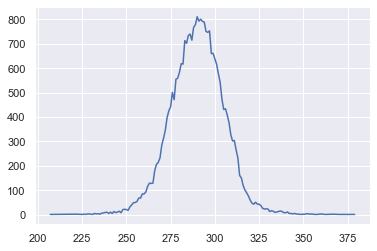

In [11]:
grasp('age')

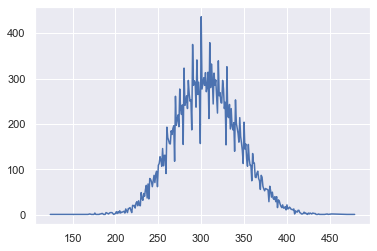

In [12]:
grasp('weight')

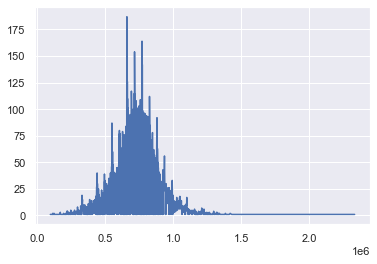

In [13]:
grasp('price')

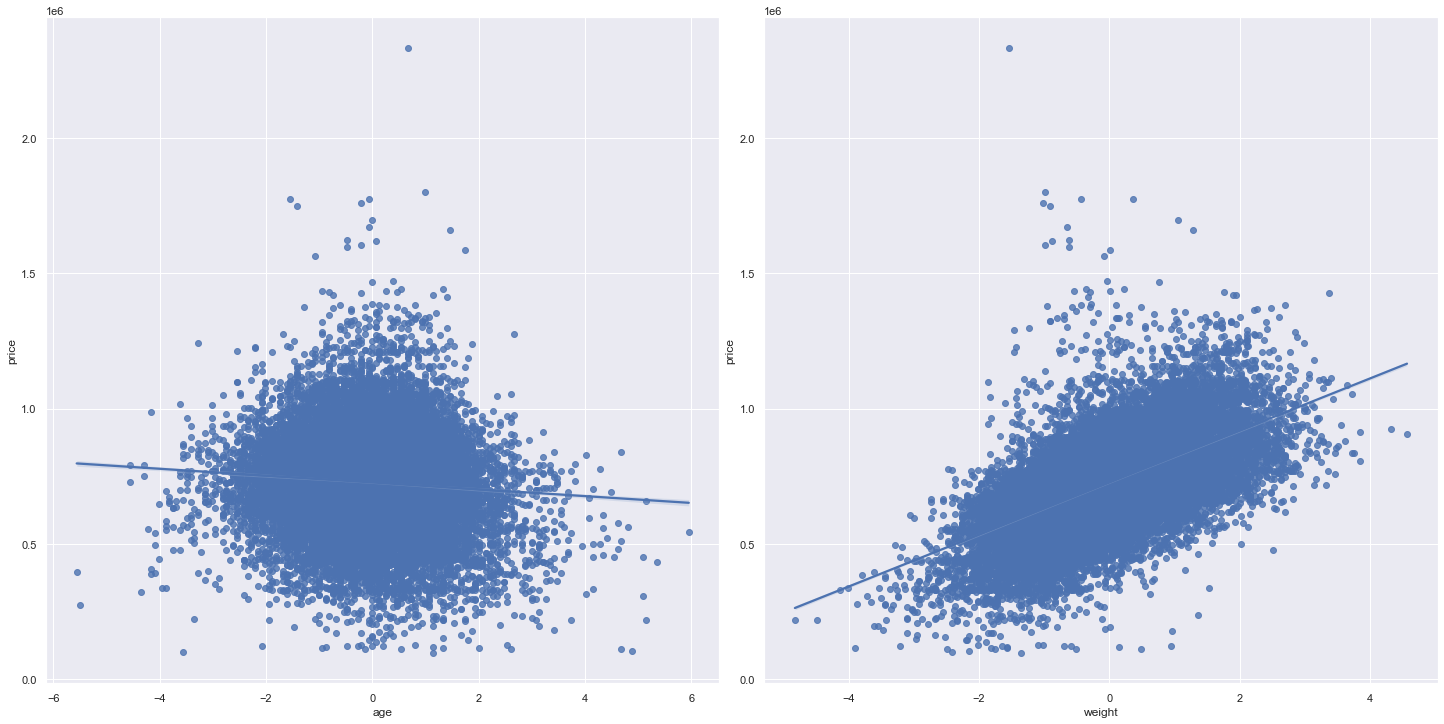

In [14]:
from sklearn.preprocessing import StandardScaler

standard_sc = StandardScaler()

column_list = ['age','weight']
x = df_copy.loc[:,column_list]
y = df_copy['price']
x = pd.DataFrame(data=standard_sc.fit_transform(x), columns=column_list)
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_list):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## 説明変数 weght

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr = LinearRegression()

X = df_copy[['weight']].values
y = df_copy[['price']].values

train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [94]:
lr.fit(train_X,train_y)

LinearRegression()

In [101]:
pred_y = lr.predict(test_X)
pred_train_y = lr.predict(train_X)

In [102]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, pred_y)#テストデータを用いた値

17760348520.722427

In [105]:
mean_squared_error(train_y,pred_train_y)# 学習データを用いた値

16632643503.589619

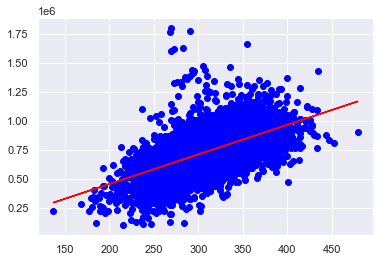

In [82]:
plt.scatter(test_X, test_y, color = 'blue')
plt.plot(test_X, pred_y, color = 'red')
plt.show()

## 説明変数 age

In [88]:
lr = LinearRegression()

X = df_copy[['age']].values
y = df_copy[['price']].values

train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [89]:
lr.fit(train_X,train_y)
pred_y = lr.predict(test_X)
mean_squared_error(test_y, pred_y)
# lr.score(test_X, test_y)

26675923013.66442

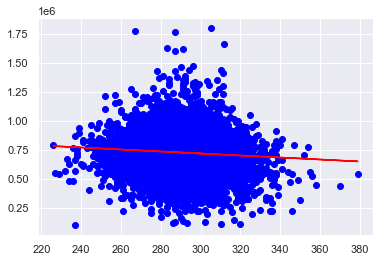

In [90]:
plt.scatter(test_X, test_y, color = 'blue')
plt.plot(test_X, pred_y, color = 'red')
plt.show()

## 説明変数 weight・age

In [137]:
lr = LinearRegression()

X = df_copy[['weight','age']]
y = df_copy[['price']]

train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [138]:
lr.fit(train_X,train_y)
pred_y = lr.predict(test_X)
mean_squared_error(test_y, pred_y)#テストデータを用いた値

17440868421.95811

In [139]:
pred_train_y = lr.predict(train_X)
mean_squared_error(train_y,pred_train_y)#学習データを用いた値

16247252744.816128

### 説明変数 weight・age 標準化

In [127]:
column = df_copy.columns[5:]
df_copy = df_copy.iloc[0:len(df_copy),[5,6,7]]
df_copy.columns = column

IndexError: positional indexers are out-of-bounds

In [135]:
standard_sc = StandardScaler()
X = df_copy.drop(columns = ['price'])
y = df_copy[['price']]
X = standard_sc.fit_transform(X)
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=42)


lr.fit(train_X,train_y)
pred_y = lr.predict(test_X)
mean_squared_error(test_y,pred_y)#テストデータを用いた値

17440868421.95811

In [136]:
pred_train_y = lr.predict(train_X)
mean_squared_error(train_y,pred_train_y)#学習データを用いた値

16247252744.816128

体重と日令はばらつきが同じくらいなため標準化しても二乗平均誤差は同じ

## ランダムフォレスト

In [146]:
from sklearn.ensemble import RandomForestRegressor
X = df_dummied.drop(columns = ['価格'])
y = df_dummied[['価格']]
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=42)
model = RandomForestRegressor(random_state=0)

model.fit(train_X,train_y)

/var/folders/5w/f6yfy31s1fldqfnxdzv8ycj00000gn/T/ipykernel_95883/412230293.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X,train_y)


RandomForestRegressor(random_state=0)

In [147]:
pred_y = model.predict(test_X)
mean_squared_error(test_y,pred_y)#テストデータを用いた値

13046469172.926239

In [148]:
pred_train_y = model.predict(train_X)
mean_squared_error(train_y,pred_train_y)#学習データを用いた値

1713520342.198015

### 血統のみ

In [191]:
column = df.columns[:5]
col = df.columns[7]
_df = df.iloc[0:len(df),[0,1,2,3,4]]
__df = df.iloc[0:len(df),[7]]
_df.columns = column
_df = pd.concat([_df,__df], axis=1)

In [241]:
_df_dummied = pd.get_dummies(_df.drop_first=True)
_df_dummied

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2237819994.py, line 1)

In [195]:
from sklearn.ensemble import RandomForestRegressor
X = _df_dummied.drop(columns = ['価格'])
y = _df_dummied[['価格']]
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=42)
model = RandomForestRegressor(random_state=0)

model.fit(train_X,train_y)

pred_y = model.predict(test_X)
mean_squared_error(test_y,pred_y)#テストデータを用いた値

/var/folders/5w/f6yfy31s1fldqfnxdzv8ycj00000gn/T/ipykernel_95883/4027460018.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X,train_y)


20926800967.895267

In [196]:
pred_train_y = model.predict(train_X)
mean_squared_error(train_y,pred_train_y)#学習データを用いた値

6584847871.687473

## k-Fold交差検証

In [242]:
df_x = df.drop(columns=['価格'])
df_x = pd.get_dummies(df_x,drop_first=True)
df_y = df['価格']

In [243]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, shuffle=True, random_state=1)

scores = []

for train_index, test_index, in kf.split(df_x):
    train_x = df_x.iloc[train_index]
    test_x  = df_x.iloc[test_index]
    train_y = df_y.iloc[train_index]
    test_y  = df_y.iloc[test_index]

    model = RandomForestRegressor(random_state=42)
    model.fit(train_x,train_y)
    pred_y = model.predict(test_x)
    pred_train_y = model.predict(train_x)
    score = mean_squared_error(test_y,pred_y)
    scores.append(score)
    print('テストデータを用いた値',score)
    print('学習データを用いた値',mean_squared_error(train_y,pred_train_y))
# print('平均スコア',np.mean(scores))

テストデータを用いた値 12349145056.031273
学習データを用いた値 1752497059.1752915
テストデータを用いた値 12077026269.814062
学習データを用いた値 1769073578.8510633
テストデータを用いた値 12996737363.748722
学習データを用いた値 1708420344.9499965
テストデータを用いた値 12287902101.584019
学習データを用いた値 1740276399.3024902


## アンサンブル学習

In [212]:
X = df_dummied.drop(columns = '価格')
y = df_dummied['価格']

In [214]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [223]:
import xgboost as xgb

model_1 = LinearRegression()
model_2 = RandomForestRegressor()
model_3 = xgb.train()

model_1.fit(X_train,y_train)
model_2.fit(X_train,y_train)
model_3.fit(X_train,y_train)

TypeError: train() missing 2 required positional arguments: 'params' and 'dtrain'

In [237]:
df_dummied = pd.get_dummies(df,drop_first=True)
df_dummied

,日令,体重,価格,性別_雄,性別_雌,父牛_久晴茂,父牛_久百合,父牛_久福久,父牛_久茂国,父牛_久茂福,...,母の祖祖父_雲仙丸,母の祖祖父_頼山,母の祖祖父_飛騨白清,母の祖祖父_高栄,母の祖祖父_高森,母の祖祖父_高竜,母の祖祖父_鶴長,母の祖祖父_鶴１６５の９,母の祖祖父_鹿秀土井,母の祖祖父_２１世紀
0,292,276,618200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,286,293,782100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,297,305,697400,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,297,258,676500,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,297,301,712800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28226,294,314,748000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28227,290,318,806300,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28228,259,309,871200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28229,293,353,875600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [239]:
X = df_dummied.drop(columns = ['価格'])
y = df_dummied['価格']

train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [240]:
dtrain = xgb.DMatrix(train_X, train_y)
dvalid = xgb.DMatrix(test_X, test_y)
params = {
    "objective" : "reg:squarederror",
    "eval_metric" : "rmse"
}

model = xgb.train(
    params = params,
    dtrain = dtrain,
    evals = [(dtrain, "train"), (dvalid, "valid")],
    num_boost_round = 100
)

pred = model.predict(xgb.DMatrix(test_X))

[0]	train-rmse:528095.48033	valid-rmse:529923.14891
[1]	train-rmse:378861.35534	valid-rmse:381079.23352
[2]	train-rmse:277052.22023	valid-rmse:279671.48001
[3]	train-rmse:209307.19347	valid-rmse:212769.55701
[4]	train-rmse:165879.65760	valid-rmse:170461.59270
[5]	train-rmse:139069.43338	valid-rmse:144719.75998
[6]	train-rmse:123422.86833	valid-rmse:129997.54377
[7]	train-rmse:113858.33685	valid-rmse:120711.72745
[8]	train-rmse:108769.05412	valid-rmse:116334.64094
[9]	train-rmse:106005.74806	valid-rmse:114164.30702
[10]	train-rmse:104311.08602	valid-rmse:113109.13133
[11]	train-rmse:103310.58523	valid-rmse:112377.93158
[12]	train-rmse:102377.20108	valid-rmse:111886.28139
[13]	train-rmse:101768.65272	valid-rmse:111604.64968
[14]	train-rmse:101412.18738	valid-rmse:111470.04698
[15]	train-rmse:101014.79589	valid-rmse:111264.55213
[16]	train-rmse:100791.90709	valid-rmse:111146.59679
[17]	train-rmse:100491.44224	valid-rmse:110999.59160
[18]	train-rmse:100148.39779	valid-rmse:110850.46575
[19

In [233]:
with open('cow.pk', 'wb') as p:
    pickle.dump(model, p)
    
with open("cow.pk",mode="rb")as fp:
    model=pickle.load(fp)

In [8]:
sex = input("性別を入力してください:")
father = input("1代祖を入力してください:")
gland = input("2代祖を入力してください:")
gege = input("3代祖を入力してください:")
got = input("4代祖を入力してください:")
age = input("日齢を入力してください:")
wight = input("体重を入力してください:")

df = df.append({'性別': sex, '父牛': father, '母の父': gland, '母の祖父': gege, '母の祖祖父': got, '日令': age, '体重': wight, '価格': 1}, ignore_index=True)

性別を入力してください: 去勢
1代祖を入力してください: 百合茂
2代祖を入力してください: 安福久
3代祖を入力してください: 菊花国
4代祖を入力してください: 紋次郎
日齢を入力してください: 270
体重を入力してください: 300


/var/folders/5w/f6yfy31s1fldqfnxdzv8ycj00000gn/T/ipykernel_51523/3585564614.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'性別': sex, '父牛': father, '母の父': gland, '母の祖父': gege, '母の祖祖父': got, '日令': age, '体重': wight, '価格': 1}, ignore_index=True)


In [9]:
df = pd.get_dummies(df)
df.tail(1)

,価格,性別_去勢,性別_雄,性別_雌,父牛_久富福,父牛_久晴茂,父牛_久百合,父牛_久福久,父牛_久茂国,父牛_久茂福,...,体重_439,体重_441,体重_443,体重_444,体重_447,体重_448,体重_452,体重_470,体重_479,体重_300
28231,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
def price_predict(df):
    column = df.columns[5:]

    for col in column:
        df[col] = df[col].astype('int')

    df_dummied = pd.get_dummies(df)

    e = df_dummied.tail(1)

    a = e.drop(columns = ['価格'])
    d = model.predict(xgb.DMatrix(a)) 
    df = df[:-1]
    return int(d),df

In [11]:
price_predict(df)[0]

KeyboardInterrupt: 

In [ ]:
df = price_predict(df)[1]

In [24]:
df.tail()

,性別,父牛,母の父,母の祖父,母の祖祖父,日令,体重,価格
28226,雌,諒太郎,福栄,平茂勝,安平,294,314,748000
28227,雌,諒太郎,福之国,福桜（宮）,安平,290,318,806300
28228,去勢,諒太郎,平茂晴,安糸福,北国７の８,259,309,871200
28229,去勢,諒太郎,隆之国,安福久,平茂勝,293,353,875600
28230,雌,鈴音,美津照重,第１花国,紋次郎,288,254,689700
